In [1]:
import pandas as pd
import pickle
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import re

In [2]:
from bootstrap_auc import bootstrap_auc
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Dense, Flatten, Dropout
from tensorflow.keras.layers import Input, Layer
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
from umap import UMAP
import itertools
import matplotlib.pyplot as plt
import tensorflow as tf

2024-11-07 19:13:31.941793: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-07 19:13:32.095052: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-07 19:13:32.101566: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-11-07 19:13:32.101597: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if yo

In [285]:
from collections import Counter, defaultdict

from sklearn.model_selection import KFold
import umap

In [261]:
import networkx as nx
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MultiLabelBinarizer

import textstat
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize

In [269]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction import DictVectorizer

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

In [260]:
from bertopic import BERTopic

from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk import pos_tag

import string

In [107]:
import convokit
from convokit import Corpus, download, FightingWords

In [1241]:
from nltk.corpus import verbnet

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

from sklearn.decomposition import NMF

In [8]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
import spacy

from spacy.matcher import Matcher

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

# old code. no need to run

In [9]:
dat = pd.read_parquet("../data/kmeans_segments_embeddings.parquet")
dataset="SciBERT"

In [10]:
dat

,Application_id,section,embedding
0,NORMA APP id: 1181768,aims,"[0.20423673, 0.23638315, -0.059923608, 0.42780..."
1,NORMA APP id: 1181768,background,"[0.15492494, 0.03252549, -0.052484237, 0.46964..."
2,NORMA APP id: 1181768,members/misc,"[-0.34976134, 0.52177113, 0.58444166, 0.476692..."
3,NORMA APP id: 1181768,methods,"[0.27384317, 0.0795182, -0.11533973, 0.2656316..."
4,NORMA APP id: 1181773,aims,"[0.44836736, -0.16751556, -0.0390997, 0.399027..."
...,...,...,...
22610,Omada APP id: 34864,aims,"[0.39566767, -0.29489854, 0.34409174, 0.243822..."
22611,Omada APP id: 34864,background,"[0.4062848, -0.33127978, -0.13913211, 0.265398..."
22612,Omada APP id: 34870,aims,"[0.30632174, -0.16658896, 0.3496156, 0.3024040..."
22613,Omada APP id: 34870,background,"[0.07292998, -0.30757007, -0.13312697, 0.43696..."


In [719]:
reg = pd.read_csv("/kellogg/proj/hpk5609/Novo/reg_data.csv")

/tmp/ipykernel_119266/3881410062.py:1: DtypeWarning: Columns (21,41,45) have mixed types. Specify dtype option on import or set low_memory=False.
  reg = pd.read_csv("/kellogg/proj/hpk5609/Novo/reg_data.csv")


In [156]:
dat = dat.merge(reg[["Application_id", "Count as grant"]], on=["Application_id"])

In [157]:
dat["label"] = dat["Count as grant"]
dat = dat.drop(columns=["Count as grant"])

In [158]:
text_dat = pd.read_csv("../data/Kmeans_clusters.csv")

In [159]:
dat["final_section"] = dat["section"]
dat = dat.merge(text_dat, on=["Application_id", "final_section"])

In [724]:
dat = dat.merge(reg[["Application_id", "Year"]], 
         on="Application_id", 
         how="left")

In [725]:
t_dat = pd.read_parquet('/kellogg/proj/hpk5609/Novo/20230106 - Application full text.parquet')

In [728]:
dat = dat.merge(t_dat[["Application_id", "Brief_project_description_clean"]],
          on="Application_id",
          how="left")

# GPT embeddimg

In [1026]:
gpt_dat = pd.read_parquet("../data/Kmeans_gpt_embeddings.parquet")

In [1027]:
gpt_dat

,Application_id,section,embedding
0,NORMA APP id: 1181768,aims,"[-0.015031405, -0.0070989355, -0.009127202, -0..."
1,NORMA APP id: 1181768,background,"[-0.013137271, -0.0070434352, 0.015316568, -0...."
2,NORMA APP id: 1181768,members/misc,"[-0.0015192212, -0.03005446, 0.0017649776, -0...."
3,NORMA APP id: 1181768,methods,"[-0.019066636, -0.010185896, 0.017647987, -0.0..."
4,NORMA APP id: 1181773,aims,"[-0.030080017, -0.023723328, -0.026756259, -0...."
...,...,...,...
22275,Omada APP id: 34864,aims,"[-0.047228366, -0.005188704, -0.026487498, -0...."
22276,Omada APP id: 34864,background,"[-0.04784987, 0.0063949414, -0.01896044, -0.03..."
22277,Omada APP id: 34870,aims,"[-0.016748266, 0.017369594, -0.009078306, -0.0..."
22278,Omada APP id: 34870,background,"[-0.024052763, 0.014113828, -0.0062657045, -0...."


In [1030]:
gpt_dat["gpt_embedding"] = gpt_dat["embedding"]
gpt_dat = gpt_dat.drop(columns=["embedding"])

In [1032]:
dat = dat.merge(gpt_dat, on=["Application_id", "section"],
          how="left")

# Fighting ADJ/ADV/V

In [472]:
def extract_ad_v(text):
    doc = nlp(text)
    ads = [token.text for token in doc if token.pos_ in ['ADJ', 'ADV']]
    vs = [token.text for token in doc if token.pos_ in ['VERB']]
    return ads, vs

dat["ads"] = 0
dat["vs"] = 0

for i, row in dat.iterrows():
    ads, vs = extract_ad_v(row["text"])
    dat.loc[i, "ads"] = " ".join(ads)
    dat.loc[i, "vs"] = " ".join(vs)

In [665]:
background = dat.loc[dat["section"] == "background"]
fighting_bg_vs = fighting_words.find_fighing_words(background.loc[background["label"]==1]["vs"].tolist(),
                              background.loc[background["label"]==0]["vs"].tolist(),
                              "success",
                              "failed")

Vocab size is 15000
Comparing language...


In [1125]:
fighting_bg_ads[:20], fighting_bg_ads[-20:]

(                ngram    z-score   class  n
 0             healthy -10.163656  failed  1
 1          diagnostic  -8.948822  failed  1
 2               fetal  -8.449206  failed  1
 3              spinal  -8.445228  failed  1
 4            cerebral  -8.262414  failed  1
 5       mitochondrial  -7.728268  failed  1
 6                  il  -7.416334  failed  1
 7           dendritic  -6.820729  failed  1
 8        conventional  -6.679769  failed  1
 9            cortical  -6.465197  failed  1
 10          pediatric  -6.340615  failed  1
 11            medical  -6.309651  failed  1
 12              older  -6.219067  failed  1
 13  interdisciplinary  -6.205220  failed  1
 14           physical  -6.173721  failed  1
 15             porous  -6.166666  failed  1
 16               twin  -6.120552  failed  1
 17          autonomic  -6.039361  failed  1
 18              young  -5.904299  failed  1
 19        respiratory  -5.839520  failed  1,
               ngram    z-score    class  n
 14980    

In [1124]:
fighting_bg_vs[:20], fighting_bg_vs[-20:]

(                 z-score   class
 ngram                           
 diagnosed      -8.795391  failed
 evaluated      -7.645491  failed
 aging          -6.172738  failed
 supervised     -6.149571  failed
 measured       -6.070105  failed
 trained        -5.622190  failed
 regarding      -5.558739  failed
 evaluate       -5.148076  failed
 missed         -5.057028  failed
 estimated      -4.956994  failed
 improve        -4.731562  failed
 lead           -4.715680  failed
 hyperpolarized -4.648461  failed
 designing      -4.632302  failed
 ai             -4.599101  failed
 performing     -4.583364  failed
 seem           -4.564800  failed
 exercise       -4.476453  failed
 correlated     -4.443645  failed
 coating        -4.414224  failed,
                  z-score    class
 ngram                            
 mp              6.709676  success
 fluorinated     6.741815  success
 uncover         6.753078  success
 reprogramming   6.886859  success
 editing         7.002588  success
 edite

In [666]:
fighting_bg_ads = fighting_bg_ads.reset_index()

In [667]:
fighting_bg_ads["n"] = fighting_bg_ads["ngram"].map(lambda x:len(x.split()))
fighting_bg_ads_uni = fighting_bg_ads.loc[fighting_bg_ads["n"]==1]
fighting_bg_ads_bi = fighting_bg_ads.loc[fighting_bg_ads["n"]==2]
fighting_bg_ads_n = fighting_bg_ads.loc[fighting_bg_ads["n"]>2]

In [668]:
fighting_bg_ads_uni, fighting_bg_ads_bi, fighting_bg_ads_n

(              ngram    z-score    class  n
 0           healthy -10.163656   failed  1
 1        diagnostic  -8.948822   failed  1
 2             fetal  -8.449206   failed  1
 3            spinal  -8.445228   failed  1
 4          cerebral  -8.262414   failed  1
 ...             ...        ...      ... ..
 14995  perivascular  12.194405  success  1
 14996    epigenetic  12.359086  success  1
 14997        cyclic  12.378155  success  1
 14998    glymphatic  14.627388  success  1
 14999   rhizosphere  15.001212  success  1
 
 [4359 rows x 4 columns],
                           ngram   z-score    class  n
 59               sudden cardiac -4.332387   failed  2
 99               cross reactive -3.919550   failed  2
 106                non invasive -3.847849   failed  2
 119             cross sectional -3.751792   failed  2
 127                       il il -3.718359   failed  2
 ...                         ...       ...      ... ..
 14935             aortic aortic  6.879663  success  2
 149

In [669]:
fighting_bg_vs

,z-score,class
ngram,,
diagnosed,-8.795391,failed
evaluated,-7.645491,failed
aging,-6.172738,failed
supervised,-6.149571,failed
measured,-6.070105,failed
...,...,...
use,8.041968,success
scaffolds,8.377867,success
freezing,8.617430,success


# NER, POS

In [169]:
# Function to extract POS percentages and entity counts
def extract_entities(text):
    doc = nlp(text)
    pos_counts = {'NOUN': 0, 'VERB': 0, 'ADJ': 0, 'ADV': 0}
    total = sum(1 for _ in doc if _.pos_ in pos_counts)  # Efficient total count of relevant POS tags

    # Count POS tags
    for token in doc:
        if token.pos_ in pos_counts:
            pos_counts[token.pos_] += 1

    # Calculate percentages
    pos_percentages = {pos: (count / total * 100) if total > 0 else 0 for pos, count in pos_counts.items()}
    
    # Count entities
    entity_labels = Counter([ent.label_ for ent in doc.ents])
    
    return pos_percentages, entity_labels

In [170]:
# Process the text
results = dat['text'].apply(extract_entities)
dat['pos_data'] = results.map(lambda x: x[0])
dat['entity_counts'] = results.map(lambda x: x[1])


In [171]:
# Assuming you've aggregated all entity types across your dataset
all_entity_types = set()
dat['entity_counts'].apply(lambda counts: all_entity_types.update(counts.keys()))
all_entity_types = sorted(all_entity_types)

# Convert to DataFrame
def entities_to_vector(entity_counts):
    return [entity_counts.get(entity_type, 0) for entity_type in all_entity_types]

dat[all_entity_types] = pd.DataFrame(dat['entity_counts'].apply(entities_to_vector).tolist(), 
                                     index=dat.index)


In [172]:
dat['pos_data']

0        {'NOUN': 62.42038216560509, 'VERB': 15.9235668...
1        {'NOUN': 57.10616438356164, 'VERB': 15.9246575...
2        {'NOUN': 88.88888888888889, 'VERB': 0.0, 'ADJ'...
3        {'NOUN': 55.400696864111495, 'VERB': 19.163763...
4        {'NOUN': 55.55555555555556, 'VERB': 15.0, 'ADJ...
                               ...                        
22610    {'NOUN': 49.707602339181285, 'VERB': 26.315789...
22611    {'NOUN': 51.06382978723404, 'VERB': 21.7772215...
22612    {'NOUN': 58.152173913043484, 'VERB': 18.478260...
22613    {'NOUN': 58.370370370370374, 'VERB': 19.851851...
22614    {'NOUN': 59.855769230769226, 'VERB': 19.230769...
Name: pos_data, Length: 22615, dtype: object

In [174]:
df_expanded = dat['pos_data'].apply(pd.Series)

In [175]:
len(df_expanded)

22615

In [176]:
dat = pd.concat([dat, df_expanded], axis=1)

In [177]:
len(dat)

22615

In [263]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/hqd7333/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [288]:
def verbnet_features(text):
    words = word_tokenize(text)
    tagged = pos_tag(words)
    features = defaultdict(int)
    
    for word, tag in tagged:
        if 'VB' in tag:  # Is a verb
            classes = verbnet.classids(word)
            for cls in classes:
                features[f'verb_class_{cls}'] += 1
    
    return features

dat["verb_features"] = dat["text"].map(verbnet_features)

In [289]:
dat["verb_features"]

0        {'verb_class_other_cos-45.4': 3, 'verb_class_w...
1        {'verb_class_other_cos-45.4': 5, 'verb_class_s...
2                                                       {}
3        {'verb_class_reflexive_appearance-48.1.2': 3, ...
4        {'verb_class_obtain-13.5.2-1': 2, 'verb_class_...
                               ...                        
22610    {'verb_class_appear-48.1.1': 3, 'verb_class_bu...
22611    {'verb_class_indicate-78': 1, 'verb_class_amal...
22612    {'verb_class_wish-62': 2, 'verb_class_appear-4...
22613    {'verb_class_continue-55.3': 1, 'verb_class_ca...
22614    {'verb_class_break-45.1': 1, 'verb_class_hurt-...
Name: verb_features, Length: 22615, dtype: object

In [300]:
verb = pd.json_normalize(dat["verb_features"])
verb = verb.fillna(0)

In [301]:
pca = PCA(10)
verb_pca = pca.fit_transform(verb)

In [303]:
verb_pca.shape

(22615, 10)

In [305]:
verb_pca = pd.DataFrame(verb_pca, columns=["verb_class_pca_"+str(i) for i in range(10)])

In [309]:
dat = pd.concat([dat, verb_pca], axis=1)

In [299]:
verb_clean = verb.dropna(axis=1, thresh=len(verb)/4)
verb_clean

,verb_class_other_cos-45.4,verb_class_wish-62,verb_class_indicate-78-1-1,verb_class_reflexive_appearance-48.1.2,verb_class_calibratable_cos-45.6-1,verb_class_characterize-29.2-1-1,verb_class_contiguous_location-47.8,verb_class_fit-54.3,verb_class_admit-65,verb_class_appear-48.1.1,...,verb_class_see-30.1-1,verb_class_conjecture-29.5-1,verb_class_sight-30.2,verb_class_consume-66,verb_class_investigate-35.4,verb_class_accompany-51.7,verb_class_characterize-29.2-1,verb_class_fulfilling-13.4.1-2,verb_class_create-26.4,verb_class_characterize-29.2
0,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5.0,NaN,3.0,2.0,2.0,3.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,3.0,1.0,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.0,NaN,1.0,NaN,3.0,NaN,1.0,1.0,1.0,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22610,1.0,5.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,3.0,...,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
22611,3.0,3.0,NaN,2.0,NaN,1.0,NaN,1.0,1.0,2.0,...,2.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,2.0
22612,5.0,2.0,NaN,NaN,3.0,NaN,NaN,NaN,1.0,1.0,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
22613,4.0,1.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,1.0,...,1.0,NaN,NaN,NaN,1.0,2.0,1.0,NaN,2.0,NaN


In [403]:
dat = pd.concat([dat, verb_clean], axis=1)

In [432]:
dat = dat.fillna(0)

In [474]:
dat.columns.tolist()

['Application_id',
 'section',
 'embedding',
 'label',
 'final_section',
 'text',
 'avg_sent_x',
 'average_sentence_length',
 'longer_words_count',
 'pos_data',
 'entity_counts',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 'syntax_tree_depth',
 'clustering',
 'avg_sent_len',
 'std_sent_len',
 'ari',
 'coleman_liau',
 'flesch_reading_ease',
 'flesch_kincaid_grade',
 'gunning_fog',
 'smog_index',
 'lix',
 'processed_text',
 'longer_words_perc',
 'topic',
 'umap_embeddings',
 'num_woprds',
 'num_words',
 'perc_positive',
 'num_ent',
 'avg_sent_y',
 'brief_embedding',
 'verb_features',
 'verb_class_pca_0',
 'verb_class_pca_1',
 'verb_class_pca_2',
 'verb_class_pca_3',
 'verb_class_pca_4',
 'verb_class_pca_5',
 'verb_class_pca_6',
 'verb_class_pca_7',
 'verb_class_pca_8',
 'verb_class_pca_9',
 'verb_class_other_co

In [476]:
# dat = dat.drop(columns=["brief_embedding"])
dat.to_parquet("../data/kmeans_embedding_features.parquet", index=False)

In [986]:
# dat = dat.drop(columns=["brief_embedding"])
dat[['Application_id',
 'section',
 # 'embedding',
 'label',
 'final_section',
 # 'text',
 'avg_sent_x',
 'average_sentence_length',
 'longer_words_count',
 'pos_data',
 'entity_counts',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 'syntax_tree_depth',
 'clustering',
 'avg_sent_len',
 'std_sent_len',
 'ari',
 'coleman_liau',
 'flesch_reading_ease',
 'flesch_kincaid_grade',
 'gunning_fog',
 'smog_index',
 'lix',
 # 'processed_text',
 'longer_words_perc',
 'topic',
 # 'umap_embeddings',
 'num_woprds',
 'num_words',
 'perc_positive',
 'num_ent',
 'avg_sent_y',
 # 'brief_embedding',
 # 'verb_features',
 'verb_class_pca_0',
 'verb_class_pca_1',
 'verb_class_pca_2',
 'verb_class_pca_3',
 'verb_class_pca_4',
 'verb_class_pca_5',
 'verb_class_pca_6',
 'verb_class_pca_7',
 'verb_class_pca_8',
 'verb_class_pca_9',
 'verb_class_other_cos-45.4',
 'verb_class_wish-62',
 'verb_class_indicate-78-1-1',
 'verb_class_reflexive_appearance-48.1.2',
 'verb_class_calibratable_cos-45.6-1',
 'verb_class_characterize-29.2-1-1',
 'verb_class_contiguous_location-47.8',
 'verb_class_fit-54.3',
 'verb_class_admit-65',
 'verb_class_appear-48.1.1',
 'verb_class_build-26.1',
 'verb_class_grow-26.2',
 'verb_class_occurrence-48.3',
 'verb_class_assessment-34',
 'verb_class_see-30.1-1',
 'verb_class_conjecture-29.5-1',
 'verb_class_sight-30.2',
 'verb_class_consume-66',
 'verb_class_investigate-35.4',
 'verb_class_accompany-51.7',
 'verb_class_characterize-29.2-1',
 'verb_class_fulfilling-13.4.1-2',
 'verb_class_create-26.4',
 'verb_class_characterize-29.2',
    'frac_hype_words']].to_csv("../data/kmeans_embedding_features.csv", index=False)

# syntax tree depth

In [179]:
# Function to compute syntax tree depth
def syntax_tree_depth(text):
    doc = nlp(text)
    def token_depth(token):
        depth = 0
        while token.head != token:
            token = token.head
            depth += 1
        return depth
    return max((token_depth(token) for token in doc), default=0)

In [180]:
dat['syntax_tree_depth'] = dat['text'].apply(syntax_tree_depth)

# sentiment analysis - scibert

In [311]:
sents = pd.read_csv("../data/NOVO_avg_seg_sents.csv")

In [312]:
sents

,Application_id,section,avg_sent
0,NORMA APP id: 1181768,aims,0.248420
1,NORMA APP id: 1181768,background,0.166920
2,NORMA APP id: 1181768,members/misc,0.051500
3,NORMA APP id: 1181768,methods,0.120168
4,NORMA APP id: 1181773,aims,0.060856
...,...,...,...
22610,Omada APP id: 34864,aims,0.234935
22611,Omada APP id: 34864,background,0.115564
22612,Omada APP id: 34870,aims,0.204889
22613,Omada APP id: 34870,background,0.220878


In [314]:
dat = dat.merge(sents, on=["Application_id", "section"],
               how="left")

In [313]:
len(dat)

22615

In [162]:
len(dat)

22615

In [323]:

dat.columns.tolist()

['Application_id',
 'section',
 'embedding',
 'label',
 'final_section',
 'text',
 'avg_sent_x',
 'average_sentence_length',
 'longer_words_count',
 'pos_data',
 'entity_counts',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 'syntax_tree_depth',
 'clustering',
 'avg_sent_len',
 'std_sent_len',
 'ari',
 'coleman_liau',
 'flesch_reading_ease',
 'flesch_kincaid_grade',
 'gunning_fog',
 'smog_index',
 'lix',
 'processed_text',
 'longer_words_perc',
 'topic',
 'umap_embeddings',
 'num_woprds',
 'num_words',
 'perc_positive',
 'num_ent',
 'avg_sent_y']

# network

In [981]:
G_bg = nx.Graph()
G_aim = nx.Graph()
G_method = nx.Graph()

# Add nodes with attribute 'label'
for i, row in dat.iterrows():
    if row["section"] == "aims":
        G_aim.add_node(row["Application_id"], 
                       year=row["Year"],
                       label=row["label"])
    elif row["section"] == "background":
        G_bg.add_node(row["Application_id"], 
                       year=row["Year"],
                      label=row["label"])
    elif row["section"] == "methods":
        G_method.add_node(row["Application_id"], 
                       year=row["Year"],
                          label=row["label"])

# Add edges based on cosine similarity threshold, e.g., 0.9
threshold = 0.9
for s in ['aims', 'background', 'methods']:
    print(s)
    sub = dat.loc[dat["section"]==s]
    print(len(sub))
    normalized_embeddings = normalize(sub["embedding"].tolist())
    similarity_matrix = cosine_similarity(normalized_embeddings)
    
    # # Flatten the list
    # flat_list = list(itertools.chain(*similarity_matrix))
    
    # # Sort the list
    # sorted_list = sorted(flat_list, reverse=False)
    
    # # Calculate the index for the top 99%
    # top_75_percent_index = int(len(sorted_list) * 0.99)
    
    # # Select the top 99%
    # top_75_percent = sorted_list[top_75_percent_index]

    # print(top_75_percent)

    for i in range(len(similarity_matrix)):
        for j in range(i + 1, len(similarity_matrix)):
            if s=="aims":
                if similarity_matrix[i][j] > 0.92:
                    G_aim.add_edge(sub.iloc[i]["Application_id"], sub.iloc[j]["Application_id"])
            elif s=="background":
                if similarity_matrix[i][j] > 0.93:
                    G_bg.add_edge(sub.iloc[i]["Application_id"], sub.iloc[j]["Application_id"])
            elif s=="methods":
                if similarity_matrix[i][j] > 0.93:
                    G_method.add_edge(sub.iloc[i]["Application_id"], sub.iloc[j]["Application_id"])


aims
6181
background
7380
methods
5513


In [259]:
len(G_bg.edges)

700500

In [45]:
set(dat["section"])

{'aims', 'background', 'members/misc', 'methods'}

In [183]:
dat["clustering"] = 0

In [277]:
len(G_aim.nodes)

6181

In [285]:
clustering_coeffs_bg = nx.clustering(G_bg)
# print("Clustering Coefficients:", clustering_coeffs_bg)

clustering_coeffs_aim = nx.clustering(G_aim)
# print("Clustering Coefficients:", clustering_coeffs_aim)

clustering_coeffs_method = nx.clustering(G_method)
# print("Clustering Coefficients:", clustering_coeffs_method)



In [286]:
clustering_coeffs_bg

{'NORMA APP id: 1181768': 0.7142857142857143,
 'NORMA APP id: 1181773': 0.3605952380952381,
 'NORMA APP id: 1181775': 0.40187256809338523,
 'NORMA APP id: 1181778': 0.49473684210526314,
 'NORMA APP id: 1181779': 0.6473684210526316,
 'NORMA APP id: 1181781': 0.3470693716817271,
 'NORMA APP id: 1181782': 0.18661728705040487,
 'NORMA APP id: 1181784': 0.411323584551931,
 'NORMA APP id: 1181786': 0,
 'NORMA APP id: 1181787': 0.32472613458528954,
 'NORMA APP id: 1181791': 0.33318861029704405,
 'NORMA APP id: 1181792': 0,
 'NORMA APP id: 1181795': 0.6517412935323383,
 'NORMA APP id: 1181796': 0.33088235294117646,
 'NORMA APP id: 1181797': 0.7391304347826086,
 'NORMA APP id: 1181798': 0.3300802265219443,
 'NORMA APP id: 1181802': 0.37362637362637363,
 'NORMA APP id: 1181803': 0.06666666666666667,
 'NORMA APP id: 1181804': 0.6630824372759857,
 'NORMA APP id: 1181805': 0.31904585733664537,
 'NORMA APP id: 1181806': 0.3333333333333333,
 'NORMA APP id: 1181816': 0.4648860540827852,
 'NORMA APP id

In [287]:
for i in clustering_coeffs_bg:
    dat.loc[dat["Application_id"]==i, "clustering"] = clustering_coeffs_bg[i]
    

In [288]:
for i in clustering_coeffs_aim:
    dat.loc[dat["Application_id"]==i, "clustering"] = clustering_coeffs_aim[i]

for i in clustering_coeffs_method:
    dat.loc[dat["Application_id"]==i, "clustering"] = clustering_coeffs_method[i]

In [984]:
def percentage_positive_neighbors(graph, node):
    neighbors = list(graph.neighbors(node))
    # print(neighbors)
    # print(len(neighbors))
    if not neighbors or len(neighbors)==0:
        return 0
    # print(graph.nodes[neighbors[0]])
    positive_count = sum(graph.nodes[neighbor]['label'] for neighbor in neighbors \
                         if graph.nodes[neighbor]['year']<graph.nodes[node]['year'])
    return positive_count / len(neighbors) * 100

# Apply to each node
percent_positives = {node: percentage_positive_neighbors(G_method, node) for node in G_method.nodes()}
print("Percentage of Positive Neighbors:", percent_positives)


Percentage of Positive Neighbors: {'NORMA APP id: 1181768': 1.6129032258064515, 'NORMA APP id: 1181778': 0.0, 'NORMA APP id: 1181779': 0.0, 'NORMA APP id: 1181781': 3.519061583577713, 'NORMA APP id: 1181782': 5.0, 'NORMA APP id: 1181784': 0.0, 'NORMA APP id: 1181786': 3.829787234042553, 'NORMA APP id: 1181791': 7.6923076923076925, 'NORMA APP id: 1181792': 6.172839506172839, 'NORMA APP id: 1181795': 5.3097345132743365, 'NORMA APP id: 1181797': 0, 'NORMA APP id: 1181798': 6.976744186046512, 'NORMA APP id: 1181803': 0.0, 'NORMA APP id: 1181804': 0.0, 'NORMA APP id: 1181806': 0.0, 'NORMA APP id: 1181816': 0.0, 'NORMA APP id: 1181824': 5.7591623036649215, 'NORMA APP id: 1181827': 0, 'NORMA APP id: 1181829': 12.5, 'NORMA APP id: 1181832': 1.4534883720930232, 'NORMA APP id: 1181833': 0, 'NORMA APP id: 1181834': 4.6875, 'NORMA APP id: 1181835': 5.714285714285714, 'NORMA APP id: 1181839': 0.0, 'NORMA APP id: 1181842': 5.128205128205128, 'NORMA APP id: 1181843': 0.0, 'NORMA APP id: 1181850': 0.0

In [985]:
for i in percent_positives:
    dat.loc[dat["Application_id"]==i, "perc_positive"] = percent_positives[i]
    

# sentence length and word length

In [200]:
# Ensure you have the 'punkt' resource
nltk.download('punkt')

# Define analysis functions
def average_sentence_length(text):
    sentences = sent_tokenize(text)
    if len(sentences) == 0:  # Avoid division by zero
        return 0, 0
    sent_len = [len(word_tokenize(sentence)) for sentence in sentences]
    return sum(sent_len) / len(sentences), np.std(sent_len)
    

def count_longer_words(text, threshold=6):
    words = word_tokenize(text)
    return sum(1 for word in words if len(word) > threshold)

# Apply functions
dat['average_sentence_length'] = dat['text'].apply(average_sentence_length)
dat['longer_words_count'] = dat['text'].apply(lambda text: count_longer_words(text, threshold=6))


[nltk_data] Downloading package punkt to /home/hqd7333/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [168]:
dat.loc[dat["avg_sent"].isna()].iloc[1]["text"]

'purpose\n\nsocial media channels must be acknowledged as emerging sources of patient knowledge and communities, and consequently, healthcare professionals must know how to respond to this patient-driven evolution. in the context of diabetes, this project seeks to build such competences through an educational some intervention aimed at healthcare professionals in denmark. further, it is expected that the knowledge gained from the project will support healthcare professionals in their\xa0interaction with patients within\xa0other disease areas.\n\n\n\n\nbackground & significance of project\n\nsome platforms became popular in the early ’s, and today, a variety of text, images, videos and livestreaming flourish on channels such as facebook, instagram, twitter and youtube. in denmark,  % of the population are using at least one platform, and at this point,  % are using facebook every day (dr medieforskning ). the content on some channels is wide-ranging and complex; it is often user-generat

In [221]:
def count_longer_words_perc(text, threshold=6):
    words = word_tokenize(text)
    return sum(1 for word in words if len(word) > threshold)/len(words)

dat['longer_words_perc'] = dat['text'].map(count_longer_words_perc)

In [143]:
def count_words(text):
    words = word_tokenize(text)
    return len(words)

dat['num_words'] = dat['text'].map(count_words)

In [146]:
dat.columns.tolist()

['Application_id',
 'section',
 'embedding',
 'label',
 'final_section',
 'text',
 'avg_sent',
 'average_sentence_length',
 'longer_words_count',
 'pos_data',
 'entity_counts',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 'syntax_tree_depth',
 'clustering',
 'avg_sent_len',
 'std_sent_len',
 'ari',
 'coleman_liau',
 'flesch_reading_ease',
 'flesch_kincaid_grade',
 'gunning_fog',
 'smog_index',
 'lix',
 'processed_text',
 'longer_words_perc',
 'topic',
 'umap_embeddings',
 'num_woprds',
 'num_words']

In [202]:
dat["avg_sent_len"] = dat["average_sentence_length"].map(lambda x: x[0])
dat["std_sent_len"] = dat["average_sentence_length"].map(lambda x: x[1])

In [204]:
len(dat)

22615

# Readability

In [208]:
def calculate_readability_scores(text):
    scores = {
        'ari': textstat.automated_readability_index(text),
        'coleman_liau': textstat.coleman_liau_index(text),
        'flesch_reading_ease': textstat.flesch_reading_ease(text),
        'flesch_kincaid_grade': textstat.flesch_kincaid_grade(text),
        'gunning_fog': textstat.gunning_fog(text),
        'smog_index': textstat.smog_index(text),
        'lix': textstat.lix(text)
    }
    return scores

# Calculate readability scores for each text
readability_data = dat['text'].apply(calculate_readability_scores).apply(pd.Series)
len(readability_data)

22615

In [209]:
dat = pd.concat([dat, readability_data], axis=1)

In [210]:
len(readability_data)

22615

# topic

In [988]:
topic_model_nostop = BERTopic()

In [989]:
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [t for t in tokens if t.isalpha() and t not in stopwords.words('english')]
    return ' '.join(tokens)

dat['processed_text'] = dat['text'].apply(preprocess_text)

In [991]:
topics, probs = topic_model_nostop.fit_transform(dat["processed_text"])

KeyboardInterrupt: 

In [ ]:
topics, probs = topic_model_nostop.reduce_topics(docs, nr_topics=30)

In [ ]:
len(topics)

In [219]:
dat["topic"] = topics

In [1227]:
len(dat)

22615

# TFIDF + LDA

In [1275]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
background = dat.loc[dat["section"]=="background"]
tfidf_matrix = tfidf_vectorizer.fit_transform(background["text"])

nmf = NMF(n_components=10, random_state=42).fit(tfidf_matrix)

# Display the topics and words
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

Topic 0:
wp data project protein plant research proteins production using task
Topic 1:
care patients health patient healthcare intervention professionals nurses relatives social
Topic 2:
liver nafld fat obesity gut metabolic adipose mice microbiota insulin
Topic 3:
cells cell cancer tumor immune cd expression mice dna human
Topic 4:
women pregnancy children maternal birth risk gdm fetal offspring data
Topic 5:
bone fracture osteoporosis fractures bmd healing hip resorption cortical estrogen
Topic 6:
et al brain neurons receptor cognitive synaptic disorders ad plant
Topic 7:
td diabetes insulin glucose islets beta diabetic islet glucagon secretion
Topic 8:
muscle exercise skeletal mitochondrial insulin training glucose physical mitochondria metabolic
Topic 9:
patients treatment study clinical trial patient heart disease risk surgery


In [1250]:
nmf

NMF(n_components=10, random_state=42)

In [1279]:
nmf_topics = nmf.transform(tfidf_matrix)
nmf_dat_bg = pd.DataFrame(nmf_topics, columns=[f"nmf_topic_{i}" for i in range(10)])
nmf_dat_bg["Application_id"] = background.reset_index()["Application_id"]
nmf_dat_bg["section"] = "background"

nmf_dat_bg

,nmf_topic_0,nmf_topic_1,nmf_topic_2,nmf_topic_3,nmf_topic_4,nmf_topic_5,nmf_topic_6,nmf_topic_7,nmf_topic_8,nmf_topic_9,Application_id,section
0,0.000000,0.000000,0.000000,0.041088,0.028421,0.004182,0.004140,0.000000,0.000000,0.018318,NORMA APP id: 1181768,background
1,0.001484,0.003586,0.000000,0.111814,0.002327,0.000000,0.000000,0.000000,0.000000,0.025315,NORMA APP id: 1181773,background
2,0.018040,0.000000,0.024795,0.022339,0.000000,0.011348,0.000000,0.101656,0.000367,0.000064,NORMA APP id: 1181775,background
3,0.044389,0.003368,0.055521,0.000000,0.002708,0.000000,0.000000,0.000000,0.000000,0.000000,NORMA APP id: 1181778,background
4,0.000000,0.086064,0.000000,0.000000,0.000000,0.004311,0.001521,0.000000,0.000411,0.030749,NORMA APP id: 1181779,background
...,...,...,...,...,...,...,...,...,...,...,...,...
7375,0.057125,0.000000,0.000000,0.000000,0.000000,0.002151,0.007039,0.000403,0.002811,0.000000,Omada APP id: 34842,background
7376,0.059308,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Omada APP id: 34844,background
7377,0.039903,0.000000,0.003605,0.008731,0.000000,0.000000,0.001066,0.000000,0.000031,0.000000,Omada APP id: 34854,background
7378,0.036816,0.000000,0.000000,0.017750,0.000078,0.000000,0.000440,0.000202,0.000000,0.000000,Omada APP id: 34864,background


In [1280]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
aims = dat.loc[dat["section"]=="aims"]
tfidf_matrix = tfidf_vectorizer.fit_transform(aims["text"])

nmf = NMF(n_components=10, random_state=42).fit(tfidf_matrix)

# Display the topics and words
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

nmf_topics = nmf.transform(tfidf_matrix)
nmf_dat_aims = pd.DataFrame(nmf_topics, columns=[f"nmf_topic_{i}" for i in range(10)])
nmf_dat_aims["Application_id"] = aims.reset_index()["Application_id"]
nmf_dat_aims["section"] = "aims"

Topic 0:
cells cell human immune expression mice signaling gene specific cellular
Topic 1:
patients treatment study disease clinical primary cardiac heart outcome surgery
Topic 2:
td diabetes insulin glucose type diabetic glp secretion beta resistance
Topic 3:
cancer tumor breast treatment patients colorectal tumors metastatic survival ctdna
Topic 4:
bone fracture osteoporosis bmd glp fractures loss healing mineral mass
Topic 5:
risk women pregnancy children obesity maternal health disease genetic birth
Topic 6:
care health intervention patient patients aim healthcare professionals study life
Topic 7:
muscle exercise skeletal metabolic adipose mitochondrial tissue liver insulin metabolism
Topic 8:
data wp analysis clinical methods learning research models using based
Topic 9:
production protein project plant enzymes compounds proteins new enzyme high


In [1281]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, min_df=10, stop_words='english')
methods = dat.loc[dat["section"]=="methods"]
tfidf_matrix = tfidf_vectorizer.fit_transform(methods["text"])

nmf = NMF(n_components=10, random_state=42).fit(tfidf_matrix)

# Display the topics and words
feature_names = tfidf_vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))

nmf_topics = nmf.transform(tfidf_matrix)
nmf_dat_methods = pd.DataFrame(nmf_topics, columns=[f"nmf_topic_{i}" for i in range(10)])
nmf_dat_methods["Application_id"] = methods.reset_index()["Application_id"]
nmf_dat_methods["section"] = "methods"

Topic 0:
patients study treatment patient surgery hospital cancer clinical inclusion disease
Topic 1:
cells cell mice expression cd human mouse using rna experiments
Topic 2:
project research phd international results student university scientific students dissemination
Topic 3:
ethical data ethics committee danish approved animal study protection agency
Topic 4:
glucose insulin muscle exercise blood min subjects fat study diabetes
Topic 5:
women children study cohort pregnancy data danish birth population register
Topic 6:
care intervention interviews study health qualitative patient professionals nurses healthcare
Topic 7:
data using model ms protein analysis models learning based methods
Topic 8:
trial placebo participants treatment study intervention randomization randomized data blinded
Topic 9:
wp work packages project wps task deliverables milestones phd package


In [1282]:
nmf_dat = pd.concat([nmf_dat_bg, nmf_dat_methods, nmf_dat_aims])

In [1283]:
nmf_dat

,nmf_topic_0,nmf_topic_1,nmf_topic_2,nmf_topic_3,nmf_topic_4,nmf_topic_5,nmf_topic_6,nmf_topic_7,nmf_topic_8,nmf_topic_9,Application_id,section
0,0.000000,0.000000,0.000000,0.041088,0.028421,0.004182,0.004140,0.000000,0.000000,0.018318,NORMA APP id: 1181768,background
1,0.001484,0.003586,0.000000,0.111814,0.002327,0.000000,0.000000,0.000000,0.000000,0.025315,NORMA APP id: 1181773,background
2,0.018040,0.000000,0.024795,0.022339,0.000000,0.011348,0.000000,0.101656,0.000367,0.000064,NORMA APP id: 1181775,background
3,0.044389,0.003368,0.055521,0.000000,0.002708,0.000000,0.000000,0.000000,0.000000,0.000000,NORMA APP id: 1181778,background
4,0.000000,0.086064,0.000000,0.000000,0.000000,0.004311,0.001521,0.000000,0.000411,0.030749,NORMA APP id: 1181779,background
...,...,...,...,...,...,...,...,...,...,...,...,...
6176,0.000000,0.001201,0.004141,0.000000,0.001502,0.000000,0.000000,0.000000,0.000000,0.101090,Omada APP id: 34842,aims
6177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004125,0.205510,Omada APP id: 34844,aims
6178,0.006208,0.005680,0.002941,0.000000,0.000000,0.001267,0.002905,0.000000,0.004972,0.114896,Omada APP id: 34854,aims
6179,0.024410,0.000000,0.000000,0.003720,0.000000,0.000000,0.011500,0.000000,0.003904,0.078932,Omada APP id: 34864,aims


In [1285]:
dat = dat.merge(nmf_dat, on=["Application_id", "section"], how="left")

In [1255]:
len(background)

7380

In [1246]:
# Initialize CountVectorizer
vectorizer = CountVectorizer(stop_words='english')

# Convert text data into term-frequency matrix
dtm = vectorizer.fit_transform(background["text"])

# Initialize LDA Model: 3 topics
lda = LatentDirichletAllocation(n_components=10, max_iter=10, learning_method='online', random_state=42)

# Fit LDA model to the DTM
lda.fit(dtm)

LatentDirichletAllocation(learning_method='online', random_state=42)

In [1248]:
# Helper function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % topic_idx)
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        
# Display the topics
no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
mri af channels pain cardiac brain heart imaging channel nerve
Topic 1:
cell cells expression gene rna protein genes proteins fig human
Topic 2:
data project research wp based models model methods new analysis
Topic 3:
risk genetic women study studies data disease children pregnancy samples
Topic 4:
patients study treatment patient care risk clinical health data hospital
Topic 5:
protein using wp project used high production proteins different based
Topic 6:
al et iron pathway rdna coa ata damage hd cycle
Topic 7:
plant wp plants genes species soil production growth food virus
Topic 8:
insulin glucose diabetes muscle metabolic td studies study mice blood
Topic 9:
cells cell cancer patients treatment immune clinical tumor tissue using


# fighting words

In [110]:
import fighting_words

In [113]:
fighting_df = fighting_words.find_fighing_words(dat.loc[dat["label"]==0]["text"],
                                  dat.loc[dat["label"]==1]["text"],
                                  "failed",
                                  "granted")

Vocab size is 15000
Comparing language...


In [118]:
fighting_df[-50:]

,z-score,class
ngram,,
biobank,9.318298,failed
department of,9.341719,failed
work package,9.367319,failed
fgf,9.483137,failed
simulation,9.491726,failed
tb,9.492978,failed
database,9.541381,failed
icd,9.658052,failed
pm,9.668164,failed


In [258]:
fighting_df.to_csv("../results/background_fighting.csv")

# TFIDF

In [92]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /home/hqd7333/nltk_data...


True

In [95]:
class TextPreprocessor:
    def __init__(self, use_stemming=True, use_lemmatization=True):
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.use_stemming = use_stemming
        self.use_lemmatization = use_lemmatization
    
    def preprocess(self, text):
        # Convert to lower case and remove punctuations and characters and then strip
        text = text.lower()
        text = text.translate(str.maketrans('', '', string.punctuation))
        
        # Tokenize the text
        tokens = nltk.word_tokenize(text)
        filtered_words = [word for word in tokens if word not in self.stop_words]
        
        if self.use_stemming and not self.use_lemmatization:
            stemmed_words = [self.stemmer.stem(word) for word in filtered_words]
            return " ".join(stemmed_words)
        elif self.use_lemmatization and not self.use_stemming:
            lemmatized_words = [self.lemmatizer.lemmatize(word) for word in filtered_words]
            return " ".join(lemmatized_words)
        elif self.use_stemming and self.use_lemmatization:
            stemmed_and_lemmatized_words = [self.lemmatizer.lemmatize(self.stemmer.stem(word)) for word in filtered_words]
            return " ".join(stemmed_and_lemmatized_words)
        else:
            return " ".join(filtered_words)

# Initialize the preprocessor
preprocessor = TextPreprocessor()


In [276]:
# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Generate the TF-IDF matrix
tfidf_matrix = vectorizer.fit_transform(dat["processed_text"])

# Convert to dense matrix for display purposes
dense_tfidf_matrix = tfidf_matrix.todense()

# Feature names
feature_names = vectorizer.get_feature_names_out()

In [277]:
feature_names

array(['aa', 'aaa', 'aaaaa', ..., 'ﬂuency', 'ﬂuorophores', 'ﬂux'],
      dtype=object)

In [278]:
len(feature_names)

124195

In [280]:
dense_tfidf_matrix.shape

(22615, 124195)

In [286]:
pca = PCA(n_components=0.5)
tfidf_pca = pca.fit_transform(np.asarray(dense_tfidf_matrix))

In [287]:
tfidf_pca.shape

(22615, 1300)

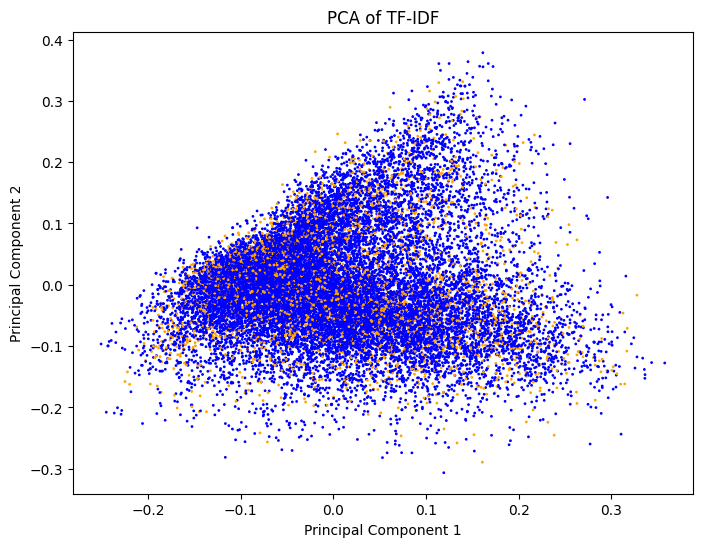

In [295]:
colors = ["blue", "orange"]
plt.figure(figsize=(8, 6))
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], s=1,
           c=[colors[int(d)] for d in dat["label"]])
plt.title('PCA of TF-IDF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()



# SAO

In [465]:
def extract_sao(text):
    doc = nlp(text)
    sao_list = []
    
    # Define patterns for matching Subject, Action, Object
    pattern = [{'DEP':'nsubj'}, {'DEP':'ROOT'}, {'DEP':'dobj'}]

    # Initialize matcher with the shared vocab
    matcher = Matcher(nlp.vocab)
    matcher.add("SAO", [pattern])
    
    matches = matcher(doc)
    for match_id, start, end in matches:
        span = doc[start:end]  # The matched span
        sao_list.append(span.text)
    
    return ' '.join(sao_list)



# Example list of extracted SAOs
sao_texts = [extract_sao(text) for text in dat["text"]]  # grant_texts should be your dataset of grant segments

vectorizer = CountVectorizer()
X_sao = vectorizer.fit_transform(sao_texts)

In [300]:
X_sao

<22615x5182 sparse matrix of type '<class 'numpy.int64'>'
	with 29316 stored elements in Compressed Sparse Row format>

In [473]:
X_sao.shape

(22615, 5182)

In [304]:
list([s for s in X_sao[1]])

[<1x5182 sparse matrix of type '<class 'numpy.int64'>'
 	with 5 stored elements in Compressed Sparse Row format>]

In [311]:
pd.DataFrame(X_sao)

,0
0,
1,"(0, 4586)\t1\n (0, 2083)\t1\n (0, 2699)\t1..."
2,
3,
4,
...,...
22610,
22611,"(0, 1034)\t1\n (0, 1331)\t1\n (0, 1243)\t1"
22612,
22613,


In [312]:
print("First 10 rows of the matrix:\n", X_sao.toarray()[:10])

First 10 rows of the matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [491]:
p10 = len(dat)/10
p10

2261.5

In [499]:
ind = [i for i, x in enumerate(X_sao.toarray().sum(axis=0).tolist()) if x>p10/10]

In [493]:
pd.DataFrame(X_sao.toarray(), columns=vectorizer.get_feature_names_out(),
            index=dat["Application_id"])

,aa,aagaard,aarhus,aas,aav,ab,abel,aberrations,abilities,ability,...,zipper,zips,zn,zol,zone,µm,østlie,βars,μl,μm
Application_id,,,,,,,,,,,,,,,,,,,,,
NORMA APP id: 1181768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NORMA APP id: 1181768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NORMA APP id: 1181768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NORMA APP id: 1181768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NORMA APP id: 1181773,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Omada APP id: 34864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Omada APP id: 34864,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Omada APP id: 34870,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [500]:
vectorizer.get_feature_names_out()[ind]

array(['access', 'contains', 'data', 'experience', 'expertise', 'group',
       'has', 'have', 'include', 'includes', 'information', 'it',
       'patients', 'provides', 'that', 'this', 'us', 'we'], dtype=object)

In [315]:
umap_reducer = umap.UMAP(n_neighbors=15, n_components=50, metric='cosine')
X_reduced = umap_reducer.fit_transform(X_sao)


In [317]:
X_reduced.shape

(22615, 50)

In [318]:
X_reduced = pd.DataFrame(X_reduced)

In [319]:
X_reduced["label"] = dat["label"]

In [324]:
X_reduced["Application_id"] = dat["Application_id"]
X_reduced_train = X_reduced.loc[X_reduced["Application_id"].isin(train_ids)]
X_reduced_test = X_reduced.loc[~X_reduced["Application_id"].isin(train_ids)]

In [331]:
# create a balanced training 
b_pos = X_reduced_train.loc[X_reduced_train["label"]==1]
b_neg = X_reduced_train.loc[X_reduced_train["label"]==0]
b_neg = b_neg.sample(len(b_pos))
b_balance_train = pd.concat([b_pos, b_neg])
b_balance_train = b_balance_train.sample(len(b_balance_train))

In [332]:
b_balance_train

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,label,Application_id
12109,16.140944,6.580689,4.574256,2.785090,5.113164,2.975025,4.254837,1.439472,3.087869,2.818591,...,4.291130,3.275064,4.723405,5.181569,2.642944,5.406044,4.202421,4.673388,1.0,NORMA APP id: 1203158
14398,15.760065,6.516746,5.067583,2.487062,4.976365,3.450918,4.632120,1.764850,3.672516,2.772779,...,4.007674,2.842187,4.469263,5.459712,2.677780,5.349702,4.487467,4.832471,0.0,NORMA APP id: 1209682
19120,15.685796,6.691762,4.606188,2.748292,4.846372,3.215613,4.701446,1.559837,3.714384,2.975171,...,4.229948,3.196512,4.543419,5.155262,2.379287,5.130777,4.196877,4.736884,0.0,Omada APP id: 23166
9869,16.022524,6.686997,4.696399,2.642554,4.729015,2.948702,4.515914,1.494314,3.530805,3.048447,...,4.037691,2.626940,4.759068,5.390925,2.515229,5.479738,4.273228,4.997237,0.0,NORMA APP id: 1198767
1221,15.637681,6.620542,4.460456,2.493033,4.647254,3.083060,4.257207,1.714748,3.673407,2.828655,...,4.196922,2.950255,4.772357,5.396175,2.409670,5.220708,4.135090,5.063747,1.0,NORMA APP id: 1182792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11877,15.713951,6.445364,4.873346,2.657997,4.613276,3.027297,4.517340,1.557342,3.630543,2.979929,...,4.114998,3.146926,4.747478,5.282507,2.674365,5.425448,4.547938,4.930086,0.0,NORMA APP id: 1202849
2732,16.057190,6.552486,4.752541,2.693427,4.971255,3.356283,4.554729,1.948426,3.441700,2.826817,...,4.168643,2.957814,4.514786,5.513383,2.502316,5.433404,4.570416,4.639445,0.0,NORMA APP id: 1186651
21420,10.083099,5.751882,2.711324,2.479717,3.483858,3.755922,3.254062,1.537397,4.211010,2.653893,...,3.693401,3.036516,4.867292,4.916672,2.994464,4.903519,3.761240,4.187473,1.0,Omada APP id: 30072
15751,15.882956,6.408944,5.004551,2.399167,4.854515,3.098017,4.337239,1.640134,3.188059,3.089331,...,4.297198,3.124294,4.621472,5.129503,2.462170,5.597652,4.281780,5.108718,0.0,NORMA APP id: 1212826


In [328]:
# create a balanced training 
b_pos = X_reduced_test.loc[X_reduced_test["label"]==1]
b_neg = X_reduced_test.loc[X_reduced_test["label"]==0]
b_neg = b_neg.sample(len(b_pos))
b_balance_test = pd.concat([b_pos, b_neg])
b_balance_test = b_balance_test.sample(len(b_balance_test))

# P-words

In [501]:
from hype_list_pg import hype_list

In [503]:
cv = CountVectorizer(vocabulary=hype_list)

In [504]:
p_words = cv.fit_transform(dat["text"])

In [517]:
p_dat = pd.DataFrame(p_words.toarray(),
            columns=hype_list)

In [524]:
p_dat["num_hype_words"] = p_dat.sum(axis=1)

In [525]:
p_dat

,first,unanswered,tremendous,desperate,sustainable,rich,surprising,dedicated,important,attractive,...,ambitious,incredible,biggest,significant,productive,overwhelming,largest,stellar,outstanding,num_hype_words
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
1,5,0,0,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,20
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,0,0,0,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22610,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
22611,4,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,17
22612,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
22613,1,0,0,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,14


In [521]:
dat = pd.concat([dat, p_dat], axis=1)

In [526]:
dat["num_hype_words"] = p_dat["num_hype_words"]
dat["frac_hype_words"] = dat["num_hype_words"]/dat["num_words"]

# prepare for classification

In [12]:
early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               verbose=1, 
                               mode='max', 
                               restore_best_weights=True)


In [13]:
dat = pd.read_parquet("../data/kmeans_embedding_features.parquet")

In [670]:
brief_dat = pd.read_parquet("../data/brief_embedding.parquet")

In [671]:
brief_dat["brief_embedding"] = brief_dat["embedding"]
brief_dat.drop(columns=["embedding"], inplace=True)

In [672]:
dat = dat.merge(brief_dat, on="Application_id", how="left")

In [17]:
train_ids = pd.read_csv("../data/train_ids.csv")
train_ids = train_ids["Application_id"].tolist()

In [167]:
concat_dat = dat.loc[dat["section"] == "background"]
concat_dat["background"] = concat_dat["embedding"]

aims = dat.loc[dat["section"] == "aims"]
aims["aims"] = aims["embedding"]

methods = dat.loc[dat["section"] == "methods"]
methods["methods"] = methods["embedding"]

concat_dat = concat_dat.merge(aims[["Application_id", "aims"]], on=["Application_id"], how="left")
concat_dat = concat_dat.merge(methods[["Application_id", "methods"]], on=["Application_id"], how="left")

/tmp/ipykernel_265415/4089271802.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_dat["background"] = concat_dat["embedding"]
/tmp/ipykernel_265415/4089271802.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aims["aims"] = aims["embedding"]
/tmp/ipykernel_265415/4089271802.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [170]:
concat_dat = concat_dat.dropna(subset=["background", "aims", "methods"])
concat_dat["embedding"] = concat_dat["background"] + concat_dat["aims"] + concat_dat["methods"]

/tmp/ipykernel_265415/3165331192.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concat_dat["embedding"] = concat_dat["background"] + concat_dat["aims"] + concat_dat["methods"]


In [126]:
# Initialize UMAP. Reduce to 2 dimensions as an example.
umap_reducer = umap.UMAP(n_components=100, random_state=42)

# Fit and transform the embeddings
reduced_embeddings = umap_reducer.fit_transform(dat["embedding"].tolist())


/kellogg/proj/hqd7333/conda/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [127]:
dat['umap_embeddings'] = list(map(list, reduced_embeddings))

In [11]:
dat["num_ent"] = dat[['CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 
    'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART']].sum(axis=1)

In [12]:
dat.columns.tolist()

['Application_id',
 'section',
 'embedding',
 'label',
 'final_section',
 'text',
 'avg_sent_x',
 'average_sentence_length',
 'longer_words_count',
 'pos_data',
 'entity_counts',
 'CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART',
 'NOUN',
 'VERB',
 'ADJ',
 'ADV',
 'syntax_tree_depth',
 'clustering',
 'avg_sent_len',
 'std_sent_len',
 'ari',
 'coleman_liau',
 'flesch_reading_ease',
 'flesch_kincaid_grade',
 'gunning_fog',
 'smog_index',
 'lix',
 'processed_text',
 'longer_words_perc',
 'topic',
 'umap_embeddings',
 'num_woprds',
 'num_words',
 'perc_positive',
 'num_ent',
 'avg_sent_y']

In [1321]:
subset = dat.loc[dat["section"] == "background"]
# subset = subset.dropna(subset=["brief_embedding"])

In [1167]:
len(subset.loc[subset["brief_embedding"].isna()])

180

In [1205]:
subset = subset.dropna()

In [1397]:
features = [
    # 'CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 
    # 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART', 
    "num_ent",
    #'NOUN', 'VERB', 'ADJ', 'ADV', 
    # 'syntax_tree_depth', 
    #'clustering', 
    'perc_positive',
    # 'avg_sent_len', 'std_sent_len', 
    # 'longer_words_perc', 
    'ari', 'coleman_liau', 'flesch_reading_ease', 'flesch_kincaid_grade', #'gunning_fog', 'smog_index', 'lix', 
    # 'topic', 
    # "avg_sent_y",
    "num_words",
    # "verb_class_other_cos-45.4",
     # 'verb_class_pca_0',
     # 'verb_class_pca_1',
     'verb_class_pca_2',
     # 'verb_class_pca_3',
     # 'verb_class_pca_4',
     # 'verb_class_pca_5',
     # 'verb_class_pca_6',
     # 'verb_class_pca_7',
     # 'verb_class_pca_8',
     # 'verb_class_pca_9',
    "frac_hype_words",
    "nmf_topic_0",
    "nmf_topic_1",
    "nmf_topic_2",
    "nmf_topic_3",
    "nmf_topic_4",
    "nmf_topic_5",
    "nmf_topic_6",
    "nmf_topic_7",
    "nmf_topic_8",
    "nmf_topic_9",
]


In [1398]:
def combine_as_list(row):
    # return list(row['umap_embeddings']) + list(row[features])
    return list(row['embedding']) + list(row[features])
    # return list(row['gpt_embedding']) + list(row[features])
    # return list(row['brief_embedding']) + list(row[features])
    # return list(row[features])
    # return list(row["embedding"]) + list(row[["topic"]])

# Apply the function to create a new column
subset['combined_list'] = subset.apply(combine_as_list, axis=1)

In [ ]:
subset['combined_list'] 

In [1399]:
train = subset.loc[subset["Application_id"].isin(train_ids)]
test = subset.loc[~subset["Application_id"].isin(train_ids)]

In [1400]:
# create a balanced training 
b_pos = train.loc[train["label"]==1]
b_neg = train.loc[train["label"]==0]
b_neg = b_neg.sample(len(b_pos), random_state=42)
b_balance_train = pd.concat([b_pos, b_neg])
b_balance_train = b_balance_train.sample(len(b_balance_train))

In [1401]:
# create a balanced testing
b_pos = test.loc[test["label"]==1]
b_neg = test.loc[test["label"]==0]
b_neg = b_neg.sample(len(b_pos), random_state=42)
b_balance_test = pd.concat([b_pos, b_neg])
b_balance_test = b_balance_test.sample(len(b_balance_test))

In [1402]:
X_train = np.array(b_balance_train["combined_list"].tolist())
y_train = np.array(b_balance_train["label"].tolist())

X_test = np.array(b_balance_test["combined_list"].tolist())
y_test = np.array(b_balance_test["label"].tolist())

X_train.shape, y_train.shape

((1910, 787), (1910,))

In [1403]:
# Standardize the data
scaler = StandardScaler()
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [412]:
np.array(X_scaled_train).shape

(1608, 790)

In [1372]:
X = np.array(subset["combined_list"].tolist())
X_scaled = scaler.transform(X)

X = np.array(X_scaled).reshape((len(X_scaled), 1, -1))  # reshaping for single timestep per sample

# classification

# GBC

In [1016]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}


In [1090]:
# Example: Initialize the GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state=42)

# Setup the grid search
grid_search = GridSearchCV(estimator=gbc, 
                           param_grid=param_grid, 
                           cv=5, 
                           scoring='accuracy', 
                           n_jobs=-1, 
                           verbose=1)

# Fit grid search
grid_search.fit(np.array(X_train),
                np.array(y_train))

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

BrokenProcessPool: A task has failed to un-serialize. Please ensure that the arguments of the function are all picklable.

In [1018]:
# Create a new model instance with the best parameters
best_model_gbc = GradientBoostingClassifier(**grid_search.best_params_)

# Fit the model on the entire training data
best_model_gbc.fit(X_train, y_train)  

# Predict probabilities
gb_pred = best_model_gbc.predict_proba(X_test)[:, 1]
# Print classification report and accuracy
# print(classification_report(y_test.tolist(), [p>0.5 for p in gb_pred[:,1]]))
print(classification_report(y_test, [p>0.5 for p in gb_pred]))
# print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57       233
         1.0       0.57      0.57      0.57       233

    accuracy                           0.57       466
   macro avg       0.57      0.57      0.57       466
weighted avg       0.57      0.57      0.57       466



AUC Score: 0.59


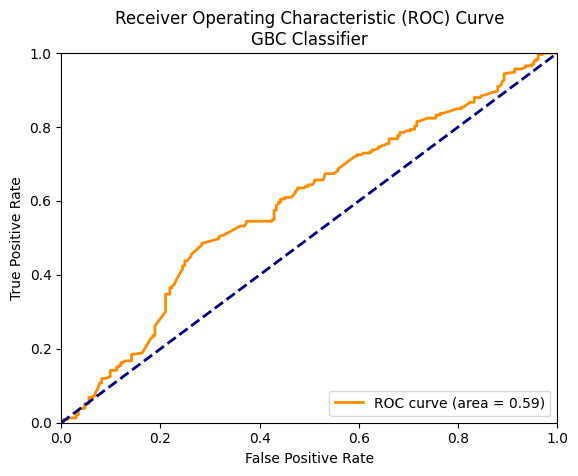

In [1019]:
# Calculate AUC
auc_score = roc_auc_score(y_test, gb_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, gb_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"GBC"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [448]:
gb_all = best_model_gbc.predict_proba(X_scaled)

# Reshape data for NN

In [1404]:
X_train = np.array(X_scaled_train).reshape((len(X_scaled_train), 1, -1))  # reshaping for single timestep per sample
X_test = np.array(X_scaled_test).reshape((len(X_scaled_test), 1, -1))  # reshaping for single timestep per sample

In [749]:
X_train = np.array(X_train).reshape((len(X_train), 1, -1))  # reshaping for single timestep per sample
X_test = np.array(X_test).reshape((len(X_test), 1, -1))  # reshaping for single timestep per sample

In [1337]:
X_scaled = np.array(X).reshape((len(X), 1, -1))  # reshaping for single timestep per sample

# biLSTM

In [1431]:
# Model configuration
n_units = 32              # Number of units in LSTM layer
dropout_rate = 0.5        # Dropout rate for regularization
n_classes = 1             # Number of output classes (set to 1 for binary classification, modify for multi-class)
input_shape = (None, X_train.shape[2]) # Input shape of each data point (sequence length, embedding dimension)

# Build the model
model_bi = Sequential([
    Bidirectional(LSTM(n_units, return_sequences=False), input_shape=input_shape),
    Dropout(dropout_rate),
    # Bidirectional(LSTM(n_units)),
    Dense(n_classes, activation='sigmoid')
])

# Model compilation
model_bi.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])

# Summary of the model
model_bi.summary()

Model: "sequential_165"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_132 (Bidirect  (None, 64)               209920    
 ional)                                                          
                                                                 
 dropout_204 (Dropout)       (None, 64)                0         
                                                                 
 dense_253 (Dense)           (None, 1)                 65        
                                                                 
Total params: 209,985
Trainable params: 209,985
Non-trainable params: 0
_________________________________________________________________


In [1432]:
# Define the K-Fold cross-validator
kfold = KFold(n_splits=5, shuffle=True, random_state=42)


In [1433]:
# This will store scores if you want to analyze them later
scores = []
best_score = float('inf')  # Change this based on your metric; use float('-inf') for maximizing a score like accuracy
best_model = None
best_fold = None

fold_no = 1
for train_index, test_index in kfold.split(X_train):
    # Split data
    X_train_sub, X_test_sub = X_train[train_index], X_train[test_index]
    y_train_sub, y_test_sub = y_train[train_index], y_train[test_index]
    model_bi = Sequential([
        Bidirectional(LSTM(n_units, return_sequences=False), input_shape=input_shape),
        Dropout(dropout_rate),
        # Bidirectional(LSTM(n_units)),
        Dense(n_classes, activation='sigmoid')
        ])

    model_bi.compile(optimizer='adam', 
                 loss='binary_crossentropy', 
                 metrics=['accuracy'])
    
    # Fit model
    print(f'Training on fold {fold_no}...')
    history = model_bi.fit(X_train_sub, y_train_sub, epochs=50, 
                           validation_data=(X_test_sub, y_test_sub), 
                        batch_size=32, verbose=1, callbacks=[early_stopping])

    # Evaluate the model
    scores.append(model_bi.evaluate(X_test_sub, y_test_sub, verbose=0))


    # Evaluate the model
    loss, accuracy = model_bi.evaluate(X_test, y_test, verbose=0)

    # Check if the current model is better; assuming we are minimizing loss
    if loss < best_score:
        best_score = loss
        best_model = model_bi
        best_fold = fold_no
    fold_no += 1

Training on fold 1...
Epoch 1/50
48/48 [==============================] - 3s 19ms/step - loss: 0.7054 - accuracy: 0.5131 - val_loss: 0.6783 - val_accuracy: 0.5654
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 0.6000 - accuracy: 0.6957 - val_loss: 0.6743 - val_accuracy: 0.5681
Epoch 3/50
48/48 [==============================] - 0s 6ms/step - loss: 0.5356 - accuracy: 0.7749 - val_loss: 0.6731 - val_accuracy: 0.5445
Epoch 4/50
48/48 [==============================] - 0s 7ms/step - loss: 0.4610 - accuracy: 0.8384 - val_loss: 0.6740 - val_accuracy: 0.5785
Epoch 5/50
48/48 [==============================] - 0s 7ms/step - loss: 0.4116 - accuracy: 0.8724 - val_loss: 0.6934 - val_accuracy: 0.5497
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 0.3589 - accuracy: 0.8927 - val_loss: 0.6928 - val_accuracy: 0.5497
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.3025 - accuracy: 0.9202 - val_loss: 0.7274 - val_accuracy: 0.56

In [1434]:
for i, score in enumerate(scores):
    print(f'Fold {i+1}, Loss: {score[0]}, Accuracy: {score[1]}')


Fold 1, Loss: 0.6740029454231262, Accuracy: 0.5785340070724487
Fold 2, Loss: 0.6907661557197571, Accuracy: 0.5680628418922424
Fold 3, Loss: 0.6868234276771545, Accuracy: 0.5994764566421509
Fold 4, Loss: 0.7411991357803345, Accuracy: 0.6020942330360413
Fold 5, Loss: 0.6884464621543884, Accuracy: 0.5523560047149658


16/16 [==============================] - 1s 3ms/step
AUC Score: 0.62


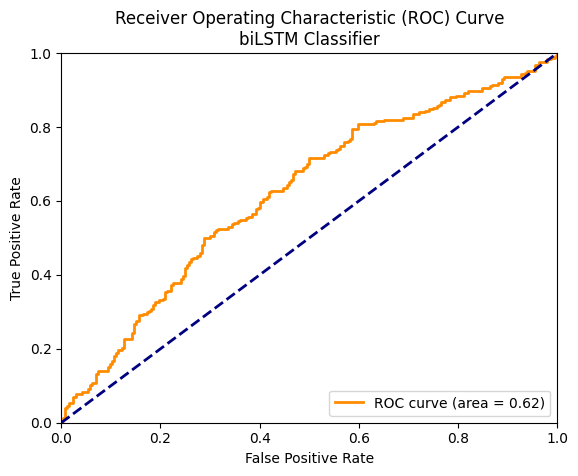

In [1435]:
bi_pred = best_model.predict(X_test)

# Calculate AUC
auc_score = roc_auc_score(y_test, bi_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, bi_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"biLSTM"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1436]:
print(classification_report(y_test, [p>0.5 for p in bi_pred]))

              precision    recall  f1-score   support

         0.0       0.59      0.65      0.61       244
         1.0       0.61      0.54      0.57       244

    accuracy                           0.59       488
   macro avg       0.60      0.59      0.59       488
weighted avg       0.60      0.59      0.59       488



In [1219]:
model_bi.save("../results/kmeans_aims_bilstm_scibert.model")

INFO:tensorflow:Assets written to: ../results/kmeans_aims_bilstm_scibert.model/assets


INFO:tensorflow:Assets written to: ../results/kmeans_aims_bilstm_scibert.model/assets


In [1338]:
bi_all = best_model.predict(X_scaled)

231/231 [==============================] - 1s 2ms/step


In [1339]:
bi = pd.DataFrame(bi_all, columns=["background"])

In [1340]:
bi["Application_id"] = subset["Application_id"]
bi.to_csv("../results/final_bg_bilstm.csv", index=False)

# Attention

In [1341]:
class AttentionLayer(Layer):
    def __init__(self):
        super(AttentionLayer, self).__init__()
    
    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], 1),
                                 initializer='random_normal',
                                 trainable=True)
        self.b = self.add_weight(shape=(input_shape[1], 1),
                                 initializer='zeros',
                                 trainable=True)
        super(AttentionLayer, self).build(input_shape)

    def call(self, inputs):
        # Applying a simple attention mechanism
        e = tf.nn.tanh(tf.tensordot(inputs, self.W, axes=1) + self.b)
        a = tf.nn.softmax(e, axis=1)
        output = tf.reduce_sum(inputs * a, axis=1)
        return output


In [1342]:
def build_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # Attention Layer
    attention_output = AttentionLayer()(inputs)
    
    # Flatten to connect to a dense layer
    flatten = Flatten()(attention_output)
    
    # Dense Layer for classification
    dense_layer = Dense(64, activation='tanh')(flatten)
    dropout = Dropout(0.5)(dense_layer)
    # dense_layer = Dense(32, activation='tanh')(flatten)
    # dropout = Dropout(0.5)(dense_layer)
    # dense_layer = Dense(16, activation='tanh')(flatten)
    # dropout = Dropout(0.5)(dense_layer)
    # dense_layer = Dense(8, activation='tanh')(flatten)
    # dropout = Dropout(0.5)(dense_layer)
    outputs = Dense(1, activation='sigmoid')(dropout)  # Assuming binary classification
    
    model = Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Assuming `embeddings_matrix` is loaded with SciBERT embeddings
attention_model = build_model((1, X_train.shape[2]))
attention_model.summary()


Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_24 (InputLayer)       [(None, 1, 787)]          0         
                                                                 
 attention_layer_23 (Attenti  (None, 787)              788       
 onLayer)                                                        
                                                                 
 flatten_50 (Flatten)        (None, 787)               0         
                                                                 
 dense_208 (Dense)           (None, 64)                50432     
                                                                 
 dropout_162 (Dropout)       (None, 64)                0         
                                                                 
 dense_209 (Dense)           (None, 1)                 65        
                                                          

In [1343]:
history = attention_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2,
                    callbacks=[early_stopping])


Epoch 1/10
48/48 [==============================] - 7s 11ms/step - loss: 0.8854 - accuracy: 0.5164 - val_loss: 0.7377 - val_accuracy: 0.5602
Epoch 2/10
48/48 [==============================] - 0s 4ms/step - loss: 0.7018 - accuracy: 0.6217 - val_loss: 0.7575 - val_accuracy: 0.5288
Epoch 3/10
48/48 [==============================] - 0s 4ms/step - loss: 0.6437 - accuracy: 0.6505 - val_loss: 0.7582 - val_accuracy: 0.5576
Epoch 4/10
48/48 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.6715 - val_loss: 0.7710 - val_accuracy: 0.5550
Epoch 5/10
48/48 [==============================] - 0s 4ms/step - loss: 0.5717 - accuracy: 0.7107 - val_loss: 0.7735 - val_accuracy: 0.5445
Epoch 6/10
48/48 [==============================] - 0s 5ms/step - loss: 0.5358 - accuracy: 0.7212 - val_loss: 0.7838 - val_accuracy: 0.5576
Epoch 6: early stopping


In [1344]:
# Predict on the test data
atten_pred = attention_model.predict(X_test)

min(atten_pred), max(atten_pred)

16/16 [==============================] - 0s 2ms/step


(array([0.05522327], dtype=float32), array([0.92324454], dtype=float32))

AUC Score: 0.56


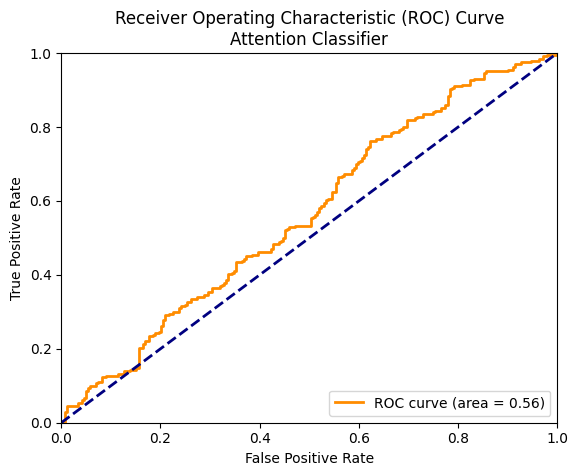

In [1345]:
# Calculate AUC
auc_score = roc_auc_score(y_test, atten_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, atten_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"Attention"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1346]:
print(classification_report(y_test, [p>0.5 for p in atten_pred]))


              precision    recall  f1-score   support

         0.0       0.52      0.59      0.55       244
         1.0       0.53      0.46      0.49       244

    accuracy                           0.53       488
   macro avg       0.53      0.53      0.52       488
weighted avg       0.53      0.53      0.52       488



In [768]:
atten_all = attention_model.predict(X_scaled)

225/225 [==============================] - 0s 1ms/step


# NN

In [1347]:
model_nn = Sequential([
    Flatten(input_shape=(1, X_train.shape[2])),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    # Dense(5, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_nn.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.1,
         callbacks=[early_stopping])


Epoch 1/30
54/54 [==============================] - 1s 7ms/step - loss: 0.8893 - accuracy: 0.5079 - val_loss: 0.6890 - val_accuracy: 0.5602
Epoch 2/30
54/54 [==============================] - 0s 4ms/step - loss: 0.7914 - accuracy: 0.5416 - val_loss: 0.6845 - val_accuracy: 0.5864
Epoch 3/30
54/54 [==============================] - 0s 4ms/step - loss: 0.7375 - accuracy: 0.5660 - val_loss: 0.7020 - val_accuracy: 0.5602
Epoch 4/30
54/54 [==============================] - 0s 3ms/step - loss: 0.7217 - accuracy: 0.5742 - val_loss: 0.6969 - val_accuracy: 0.5707
Epoch 5/30
54/54 [==============================] - 0s 3ms/step - loss: 0.6870 - accuracy: 0.6044 - val_loss: 0.6938 - val_accuracy: 0.5340
Epoch 6/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6705 - accuracy: 0.6067 - val_loss: 0.6996 - val_accuracy: 0.5393
Epoch 7/30
54/54 [==============================] - 0s 4ms/step - loss: 0.6412 - accuracy: 0.6323 - val_loss: 0.6944 - val_accuracy: 0.5602
Epoch 7: early stopp

16/16 [==============================] - 0s 1ms/step
AUC Score: 0.58


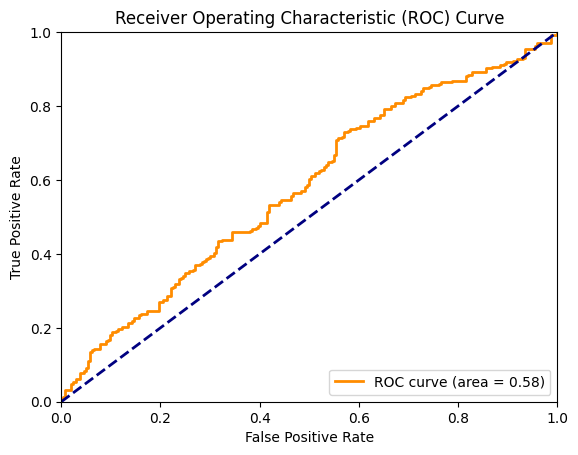

In [1348]:
predictions = model_nn.predict(X_test)

# Calculate AUC
auc_score = roc_auc_score(y_test, predictions)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, predictions)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1349]:
print(classification_report(y_test, [p>0.5 for p in predictions]))

              precision    recall  f1-score   support

         0.0       0.55      0.52      0.53       244
         1.0       0.54      0.57      0.55       244

    accuracy                           0.54       488
   macro avg       0.54      0.54      0.54       488
weighted avg       0.54      0.54      0.54       488



# LSTM

In [1350]:
def create_lstm_model():
    model = Sequential()
    # Add an LSTM layer
    # Assume 'None' sequence length which allows variable-length sequences
    # Each feature vector has a dimension of 768
    model.add(LSTM(128, input_shape=(None, X_train.shape[2]), 
                   return_sequences=False))  # 'return_sequences' is True if you want to stack another LSTM layer or need sequence output
    
    # Dropout(0.2),
    # Optional: Add additional LSTM layers, make sure to set return_sequences=True for all but the last LSTM layer
    # model.add(LSTM(64, return_sequences=False))
    
    # # Optional: Add additional LSTM layers, make sure to set return_sequences=True for all but the last LSTM layer
    # model.add(LSTM(128, return_sequences=False))

    # Flatten the output to remove any unnecessary dimensions
    model.add(Flatten())  # This might be redundant if return_sequences=False
    
    # Add a Dense layer for output
    model.add(Dense(1, activation='sigmoid'))  # Adjust the number of units and activation based on your specific problem

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the model
model_lstm = create_lstm_model()

# Model summary
model_lstm.summary()


Model: "sequential_125"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_116 (LSTM)             (None, 128)               468992    
                                                                 
 flatten_52 (Flatten)        (None, 128)               0         
                                                                 
 dense_213 (Dense)           (None, 1)                 129       
                                                                 
Total params: 469,121
Trainable params: 469,121
Non-trainable params: 0
_________________________________________________________________


In [1351]:
model_lstm.fit(X_train, y_train, 
          epochs=30, 
          batch_size=32, 
          validation_split=0.1,
         callbacks=[early_stopping])


Epoch 1/30
54/54 [==============================] - 2s 15ms/step - loss: 0.6933 - accuracy: 0.5416 - val_loss: 0.6798 - val_accuracy: 0.5759
Epoch 2/30
54/54 [==============================] - 0s 6ms/step - loss: 0.5047 - accuracy: 0.7993 - val_loss: 0.6939 - val_accuracy: 0.5759
Epoch 3/30
54/54 [==============================] - 0s 5ms/step - loss: 0.3777 - accuracy: 0.9034 - val_loss: 0.7264 - val_accuracy: 0.5602
Epoch 4/30
54/54 [==============================] - 0s 6ms/step - loss: 0.2594 - accuracy: 0.9593 - val_loss: 0.7608 - val_accuracy: 0.5759
Epoch 5/30
54/54 [==============================] - 0s 6ms/step - loss: 0.1611 - accuracy: 0.9849 - val_loss: 0.7745 - val_accuracy: 0.5812
Epoch 6/30
54/54 [==============================] - 0s 6ms/step - loss: 0.1017 - accuracy: 0.9889 - val_loss: 0.8049 - val_accuracy: 0.5864
Epoch 7/30
54/54 [==============================] - 0s 6ms/step - loss: 0.0664 - accuracy: 0.9953 - val_loss: 0.8355 - val_accuracy: 0.5654
Epoch 8/30
54/54 [=

16/16 [==============================] - 0s 3ms/step
AUC Score: 0.59


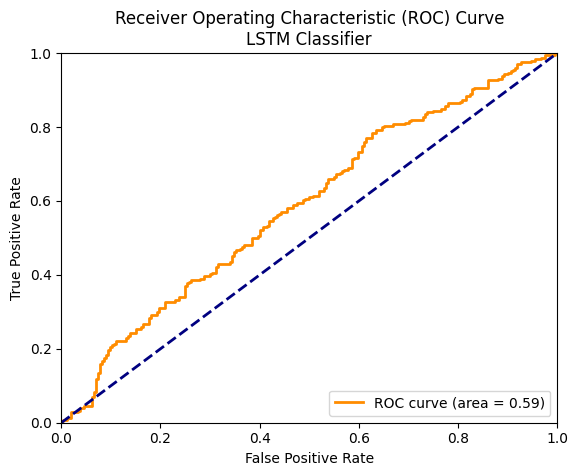

In [1352]:
lstm_pred = model_lstm.predict(X_test)

# Calculate AUC
auc_score = roc_auc_score(y_test, lstm_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, lstm_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"LSTM"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1353]:
print(classification_report(y_test, [p>0.5 for p in lstm_pred]))

              precision    recall  f1-score   support

         0.0       0.56      0.53      0.55       244
         1.0       0.56      0.59      0.57       244

    accuracy                           0.56       488
   macro avg       0.56      0.56      0.56       488
weighted avg       0.56      0.56      0.56       488



In [706]:
lstm_all = model_lstm.predict(X_scaled)

225/225 [==============================] - 0s 2ms/step


In [84]:
# y_pred = model_lstm.predict(X)
# concat_dat["concat_prediction"] = y_pred
# concat_dat.to_csv("../data/Kmeans_concat_lstm_pred.csv", index=False)

# Random forest

In [1354]:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],  # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],  # Maximum number of levels in tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}


In [1355]:
# Initialize the classifier
rf = RandomForestClassifier(random_state=42)

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, verbose=1, n_jobs=-1)


In [1356]:
grid_search.fit(X_train.reshape(len(X_train), -1), y_train)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [1357]:
print("Best parameters:", grid_search.best_params_)
print("Best cross-validated score: {:.2f}".format(grid_search.best_score_))

# Get the best model
model_rf = grid_search.best_estimator_


Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validated score: 0.59


AUC Score: 0.62


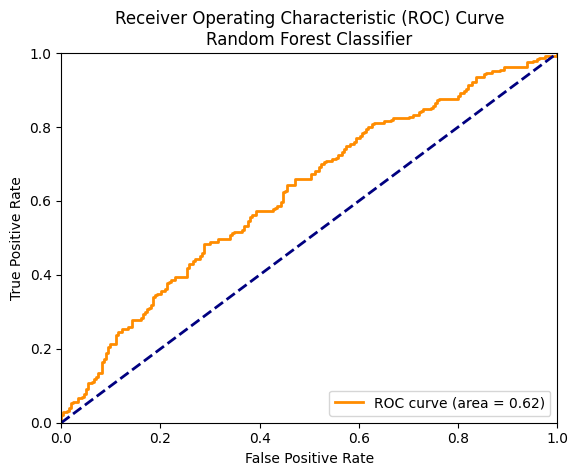

In [1358]:
rf_pred = model_rf.predict_proba(X_test.reshape(len(X_test), -1))[:,1]

# Calculate AUC
auc_score = roc_auc_score(y_test, rf_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"Random Forest"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1359]:
print(classification_report(y_test, [p>0.5 for p in rf_pred]))

              precision    recall  f1-score   support

         0.0       0.58      0.56      0.57       244
         1.0       0.57      0.60      0.59       244

    accuracy                           0.58       488
   macro avg       0.58      0.58      0.58       488
weighted avg       0.58      0.58      0.58       488



In [713]:
rf_all = model_rf.predict_proba(X_scaled.reshape(len(X_scaled), -1))[:,1]

# NB

In [1360]:
nb_model = Pipeline([
    ('tfidf', TfidfVectorizer()),#preprocessor=preprocessor.preprocess)),
    ('nb', MultinomialNB())
])

In [1361]:
nb_model.fit(np.array(b_balance_train["processed_text"].tolist()), b_balance_train["label"])

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('nb', MultinomialNB())])

In [1362]:
nb_pred = nb_model.predict(np.array(b_balance_test["processed_text"].tolist()))
print(classification_report(b_balance_test["label"], nb_pred))


              precision    recall  f1-score   support

         0.0       0.58      0.65      0.62       244
         1.0       0.60      0.53      0.57       244

    accuracy                           0.59       488
   macro avg       0.59      0.59      0.59       488
weighted avg       0.59      0.59      0.59       488



AUC Score: 0.63


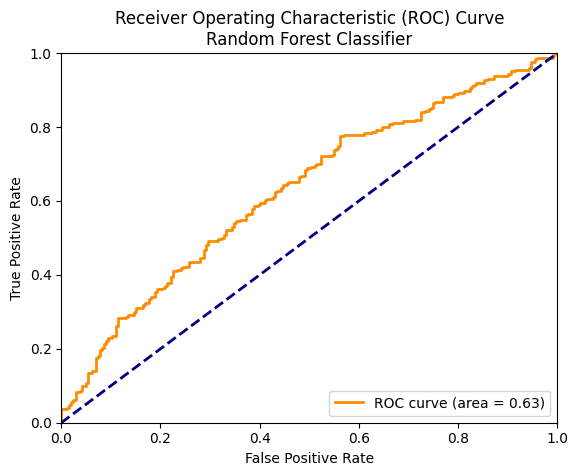

In [1363]:
nb_pred = nb_model.predict_proba(np.array(b_balance_test["processed_text"].tolist()))[:,1]

# Calculate AUC
auc_score = roc_auc_score(b_balance_test["label"], nb_pred)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(b_balance_test["label"], nb_pred)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"Random Forest"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [1364]:

# Extract the vectorizer and the classifier from the pipeline
vectorizer = nb_model.named_steps['tfidf']
classifier = nb_model.named_steps['nb']

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Get log probabilities of features given a class
log_probabilities = classifier.feature_log_prob_

# Assuming you have labels or categories named
class_labels = [str(i) for i in range(classifier.class_count_.size)]  # Creating dummy class labels if not available

# For each class, print the top N most important features
num_features = 15  # Top 5 features for simplicity
for i, class_label in enumerate(class_labels):
    top_features_indices = np.argsort(log_probabilities[i])[-num_features:]
    print(f"Top features for class '{class_label}':")
    for feature_index in top_features_indices:
        print(f"  {feature_names[feature_index]} (log probability: {log_probabilities[i][feature_index]})")
    print("\n")

Top features for class '0':
  using (log probability: -8.25738068158513)
  td (log probability: -8.25435483252264)
  diabetes (log probability: -8.251124757781495)
  clinical (log probability: -8.237735569147532)
  wp (log probability: -8.221817869573835)
  cell (log probability: -8.218878379271501)
  cancer (log probability: -8.21818914497265)
  risk (log probability: -8.218093024239845)
  disease (log probability: -8.20217487063713)
  project (log probability: -8.112096121760317)
  cells (log probability: -8.050346675956344)
  study (log probability: -7.976262312246589)
  treatment (log probability: -7.96832190446734)
  data (log probability: -7.95882157817329)
  patients (log probability: -7.426752463499659)


Top features for class '1':
  disease (log probability: -8.303208407015742)
  studies (log probability: -8.300602535777655)
  also (log probability: -8.299841146580441)
  research (log probability: -8.287734123935971)
  insulin (log probability: -8.276225067910882)
  wp (log p

In [139]:
# import joblib

# # Save the model to a file
# joblib.dump(nb_model, 'nb_background.pkl')

['nb_background.pkl']

In [1152]:
nb_all = nb_model.predict_proba(np.array(subset["processed_text"].tolist()))[:,1]

In [1128]:
len(nb_all)

6962

In [1156]:
nb = pd.DataFrame(nb_all, columns=["methods"])

In [1157]:
nb["Application_id"] = subset["Application_id"]

In [1158]:
nb.to_csv("../results/final_methods_nb.csv", index=False)

# majority vote

In [80]:
def majority_vote(*predictions):
    # Assuming predictions are NumPy arrays of the same length
    predictions = [(p>=0.5).astype(int) for p in predictions]
    # Check and print the shape of each prediction to ensure compatibility
    print("Prediction lengths:", [p.shape for p in predictions])
    predictions = np.hstack([p.reshape(-1, 1) for p in predictions]).T
    print(predictions.shape)
    # Apply majority voting
    final_preds = np.apply_along_axis(lambda x: np.bincount(x, minlength=2).argmax(), axis=0, arr=predictions)
    return final_preds


In [714]:
final_predictions = majority_vote(
    lstm_pred, 
                                  atten_pred,
                                  bi_pred, 
                                  rf_pred, 
    #                               gb_pred, 
                                  # nb_pred
)

Prediction lengths: [(466, 1), (466, 1), (466, 1), (466,)]
(4, 466)


In [136]:
len(final_predictions)

466

AUC Score: 0.57


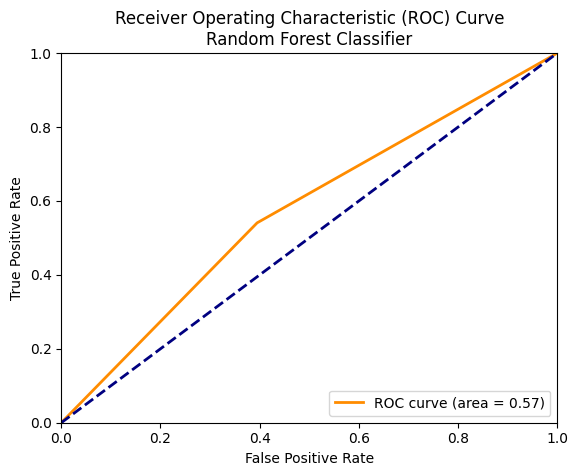

In [717]:
# Calculate AUC
auc_score = roc_auc_score(y_test, final_predictions)
print(f"AUC Score: {auc_score:.2f}")

# Get false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, final_predictions)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic (ROC) Curve\n{"Random Forest"} Classifier')
plt.legend(loc="lower right")
# plt.savefig("scibert_LSTM.png")

In [718]:
print(classification_report(y_test, final_predictions))

              precision    recall  f1-score   support

         0.0       0.57      0.61      0.59       233
         1.0       0.58      0.54      0.56       233

    accuracy                           0.57       466
   macro avg       0.57      0.57      0.57       466
weighted avg       0.57      0.57      0.57       466



In [193]:
all_predictions = [lstm_all, atten_all, bi_all, rf_all, gb_all[:,1]]
preds = np.hstack([p.reshape(-1, 1) for p in all_predictions])

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 0, the array at index 0 has size 7380 and the array at index 4 has size 7184

In [184]:
preds.shape

(7380, 5)

In [182]:
len(subset)

7380

In [195]:
preds = pd.DataFrame(preds, index=subset["Application_id"])

In [210]:
subset["label"]

1        0.0
5        0.0
8        0.0
10       0.0
13       1.0
        ... 
22602    0.0
22605    1.0
22608    0.0
22611    0.0
22613    0.0
Name: label, Length: 7380, dtype: float64

In [211]:
preds["label"] = subset["label"].tolist()

In [214]:
preds_train = preds.loc[preds.index.isin(train_ids)]
preds_test = preds.loc[~preds.index.isin(train_ids)]

In [247]:
# create a balanced training 
b_pos = preds_train.loc[preds_train["label"]==1]
b_neg = preds_train.loc[preds_train["label"]==0]
b_neg = b_neg.sample(len(b_pos))
b_balance_train = pd.concat([b_pos, b_neg])
b_balance_train = b_balance_train.sample(len(b_balance_train))

In [222]:
# create a balanced training 
b_pos = preds_test.loc[preds_test["label"]==1]
b_neg = preds_test.loc[preds_test["label"]==0]
b_neg = b_neg.sample(len(b_pos))
b_balance_test = pd.concat([b_pos, b_neg])
b_balance_test = b_balance_test.sample(len(b_balance_test))

In [231]:
len(b_balance_train), len(b_balance_test)

(1910, 488)

In [248]:
# Initialize the Logistic Regression model
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
model.fit(b_balance_train.drop(columns=["label"]), b_balance_train["label"])


RandomForestClassifier(n_estimators=200, random_state=42)

In [249]:
pred_pred = model.predict(b_balance_test.drop(columns=["label"]))
                          
print(classification_report(b_balance_test["label"], pred_pred))

              precision    recall  f1-score   support

         0.0       0.50      0.98      0.66       244
         1.0       0.43      0.01      0.02       244

    accuracy                           0.50       488
   macro avg       0.46      0.50      0.34       488
weighted avg       0.46      0.50      0.34       488

